# ML Basics

### Definition:
"Machine learning algorithms build a ___mathematical model___ based on ___sample data, known as "training data"___, in order to make ___predictions or decisions___ without being explicitly programmed to perform the task"

(https://en.wikipedia.org/wiki/Machine_learning)


### A more "low level" definition:

"Machine Learning is about ___building programs___ with tunable parameters (typically an array of floating point values) that are ___adjusted automatically___ so as to improve their behavior by ___adapting to previously seen data___"

(scikit-learn.org/sklearn-tutorial)


### A more "visual" description:

<img src="Images/plot_ML_flow_chart_3.png">

<img src="Images/plot_ML_flow_chart_1.png">

# A "quick" overview


## Feature extraction and representation (for image analysis) - Dimensionality reduction

Starting from an ___initial set of measured data___, building ___derived values ("features")___ intended to be:

- informative,
- non-redundant,
- facilitating the subsequent learning and generalization steps,
- leading to better interpretations


## Main categories of machine learning problems

- Unsupervised (e.g. clustering)
- Supervised (Classification)
- Reinforcement learning
- Dictionary learning


### Most common learning algorithms

- Bayesian models
- Linear/logistic regression models
- Support vector machines (SVMs)
- Decision trees
- Random forests
- k-nearest neighbors
- k-means clustering
- Neural networks / deep learning
- Dimensionality reduction and visualization
- Ensemble learning (majority voting, consensus models)


### Keywords on core concepts:

- Training, testing sets
- Model selection
- Cross-validation
- Overfitting
- Measuring accuracy/performance
- Generalizability
- Ensemble learni
- k-means clustering
- neural networks / deep learning


---

# Application: A simple (but realistic) dataset


### Import packages

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics

import pandas as pd

import seaborn as sns



Automatically created module for IPython interactive environment


### Load data

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['CatName'] = iris.target_names[iris.target]
#df['CatNo'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CatName
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Check and visualize data

Important tip: First, ___visualize___ your data, try to get a feeling of your data! 


In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.target.shape

(150,)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Plot features

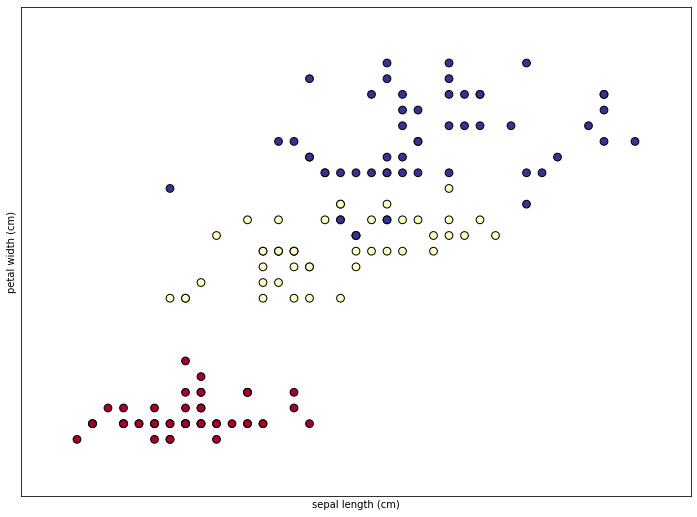

In [9]:
X = iris.data
y = iris.target

# Selected features for visualization     Change for different feature sets!
f1 = 0
f2 = 3

minF1 = X[:, f1].min()
maxF1 = X[:, f1].max()
padF1 = (maxF1 - minF1) / 10

minF2 = X[:, f2].min()
maxF2 = X[:, f2].max()
padF2 = (maxF1 - minF1) / 10

plt.figure(2, figsize=(12,9))
plt.clf()

# Plot the training points
plt.scatter(X[:, f1], X[:, f2], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=60)
plt.xlabel(iris.feature_names[f1])
plt.ylabel(iris.feature_names[f2])

plt.xlim(minF1 - padF1, maxF1 + padF1)
plt.ylim(minF2 - padF2, maxF2 + padF2)
plt.xticks(())
plt.yticks(())

plt.show()


### Plot features with pandas and sns

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CatName
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


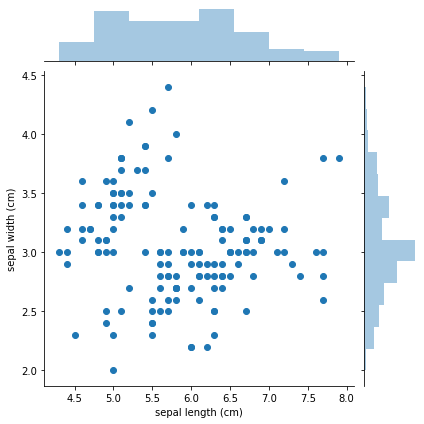

In [11]:
sns.jointplot(x='sepal length (cm)',y='sepal width (cm)',data=df)

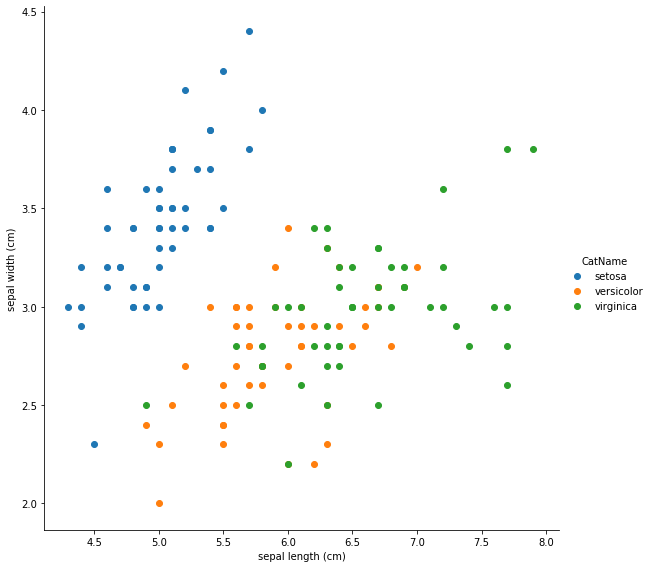

In [12]:
sns.FacetGrid(df, hue='CatName', height=8).map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()

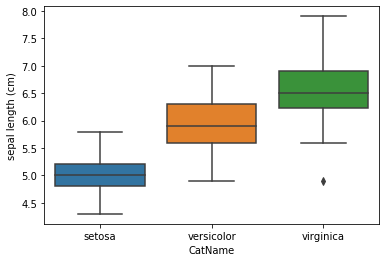

In [13]:
sns.boxplot(x='CatName',y='sepal length (cm)',data=df)

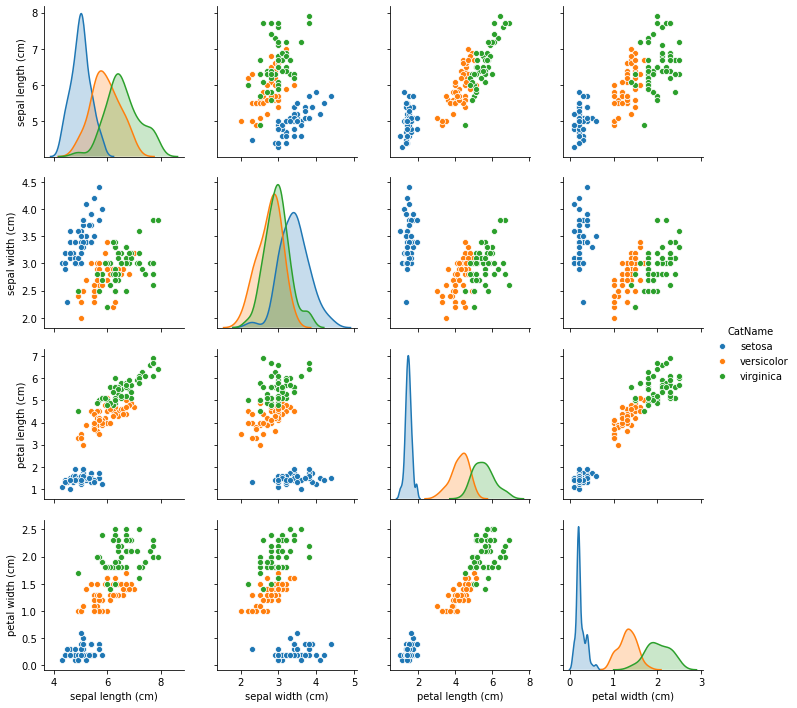

In [14]:
sns.pairplot(df,hue='CatName')

### Dimensionality reduction (PCA)

In [15]:
mdlPCA = PCA(n_components=3)
XPCA = mdlPCA.fit_transform(iris.data)

print(mdlPCA.explained_variance_)

[4.22824171 0.24267075 0.0782095 ]


In [16]:
print(mdlPCA.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261]


In [17]:
print(mdlPCA.explained_variance_ratio_.cumsum())

[0.92461872 0.97768521 0.99478782]


In [18]:
print(mdlPCA.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


<img src="Images/pca1.png" width=600>

(https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/)

In [19]:
df['PC1']= XPCA[:,0]
df['PC2']= XPCA[:,1]
df['PC3']= XPCA[:,2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CatName,PC1,PC2,PC3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


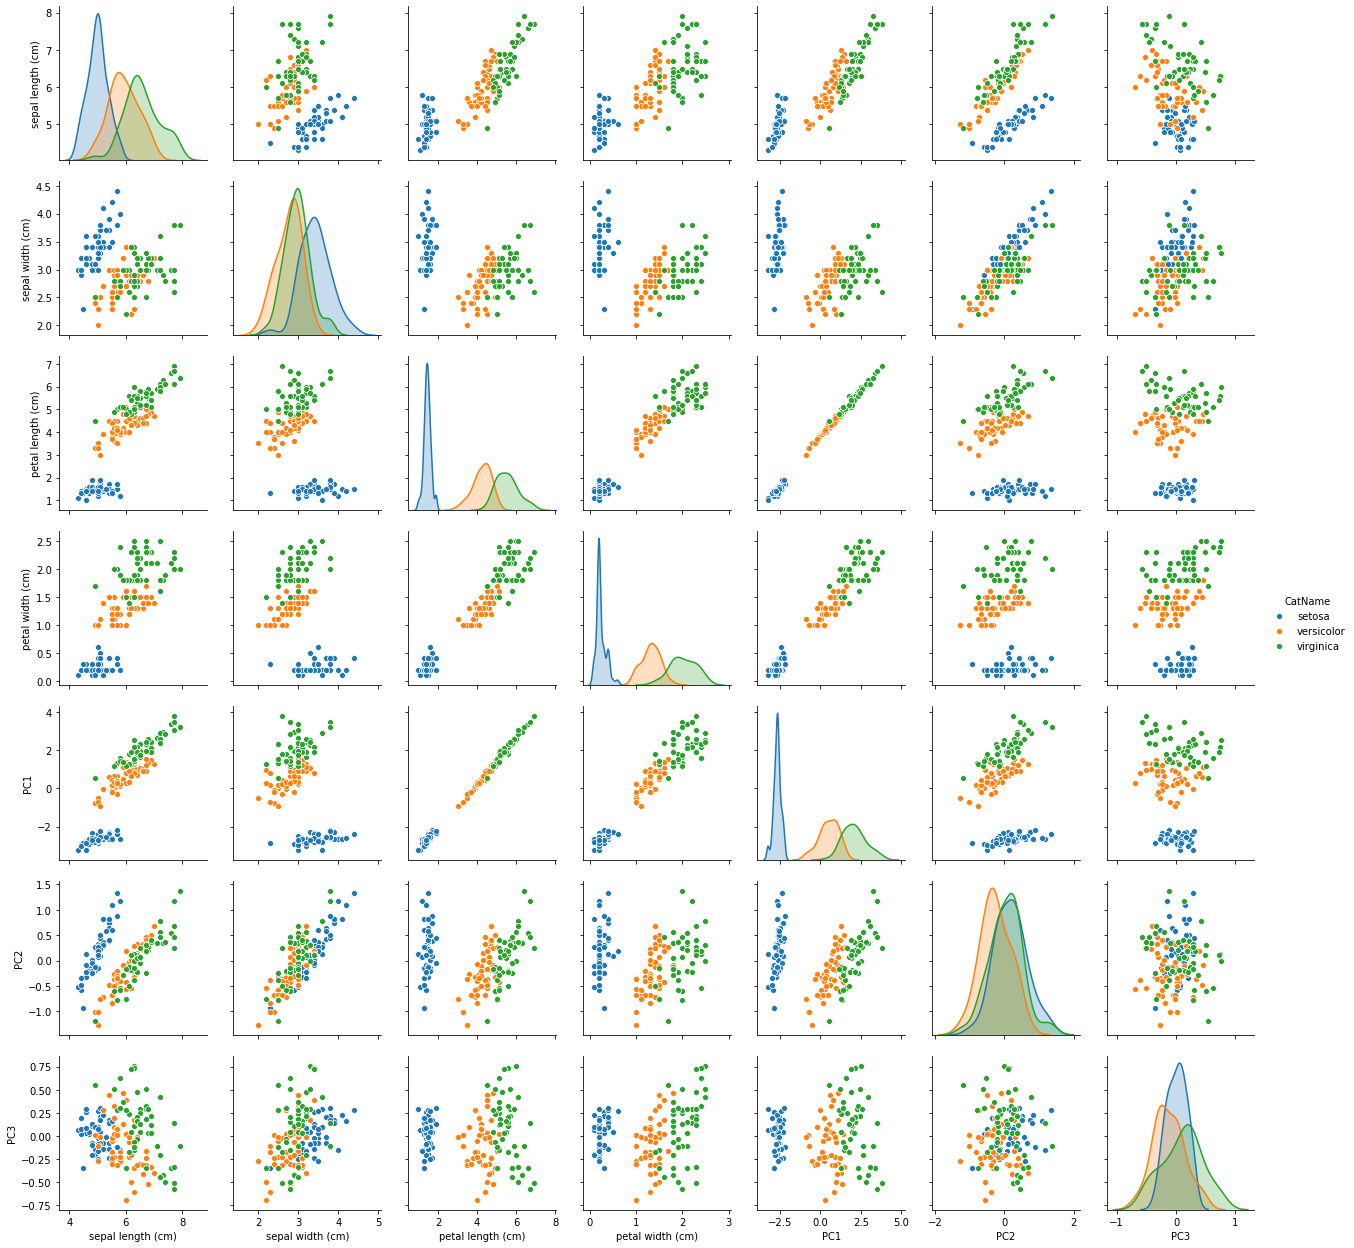

In [20]:
sns.pairplot(df,hue='CatName')

## Unsupervised learning (clustering)

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
print(km.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Evaluate and visualize clustering accuracy

In [23]:
pred = km.labels_

confMat = metrics.confusion_matrix(iris.target, pred, labels=range(iris.target.max()+1))
print(confMat)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


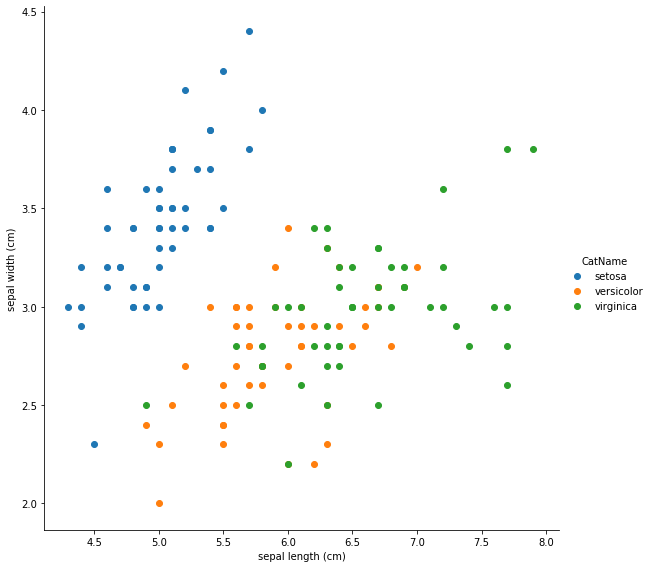

In [24]:
sns.FacetGrid(df, hue='CatName', height=8).map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()

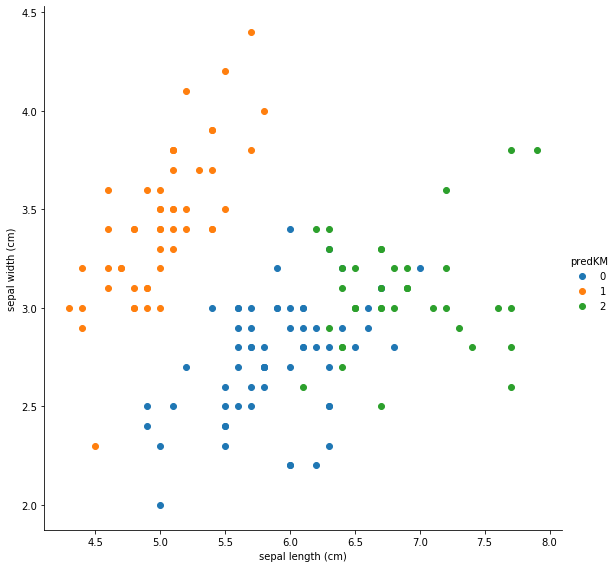

In [25]:
df['predKM'] = pred
sns.FacetGrid(df, hue='predKM', height=8).map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()

# Another application (this time with images, but no satellite images yet)


### Import packages



In [26]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np


### Load data



In [27]:
digits = datasets.load_digits()

### Check, visualize data


In [28]:

print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [29]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
digits.images.shape

(1797, 8, 8)

In [31]:
digits.target.shape

(1797,)

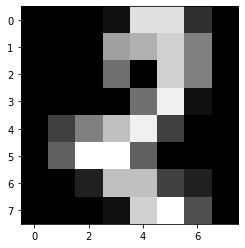

In [32]:
imgTmp = digits.images[54,:,:].squeeze()
plt.imshow(imgTmp, cmap='gray')

In [33]:
print(digits.images[54,:,:].squeeze())

[[ 0.  0.  0.  1. 14. 14.  3.  0.]
 [ 0.  0.  0. 10. 11. 13.  8.  0.]
 [ 0.  0.  0.  7.  0. 13.  8.  0.]
 [ 0.  0.  0.  0.  7. 15.  1.  0.]
 [ 0.  4.  8. 12. 15.  4.  0.  0.]
 [ 0.  6. 16. 16.  6.  0.  0.  0.]
 [ 0.  0.  2. 12. 12.  4.  2.  0.]
 [ 0.  0.  0.  1. 13. 16.  5.  0.]]


In [34]:
digits.target[54]

2

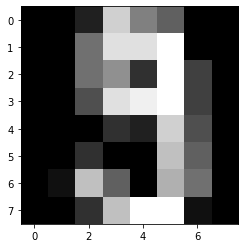

In [35]:
imgTmp = digits.images[167,:,:].squeeze()
plt.imshow(imgTmp, cmap='gray')

In [36]:
digits.target[167]

9

### Train a classifier


In [37]:
numTest = 300

XTr = digits.data[:-numTest,:]
yTr = digits.target[:-numTest]

XTe = digits.data[-numTest:,:]
yTe = digits.target[-numTest:]

print(XTr.shape)
print(XTe.shape)

print(yTr.shape)
print(yTe.shape)


(1497, 64)
(300, 64)
(1497,)
(300,)


In [38]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(XTr, yTr)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

---

<img src="Images/focus_v3.png" width=100 align='left'>

## <span style="color:red">Signature of svm.SVC</span>


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

<img src="Images/scikitSVCSign.png">

### Check the test data


In [39]:
[testDigit, testCounts] = np.unique(yTe, return_counts=True)

print(yTe)
print(testDigit)
print(testCounts)


[6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7
 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7
 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4
 6 6 6 4 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3
 6 9 6 1 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2
 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6
 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9
 0 8 9 8]
[0 1 2 3 4 5 6 7 8 9]
[27 31 28 31 33 30 31 30 28 31]


### Apply the trained model


In [40]:
pred = clf.predict(XTe)
print(pred)

[6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7
 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 1 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7
 1 9 4 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 3 7 3 3 4
 6 6 6 9 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 9 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3
 6 9 6 1 7 5 4 4 7 2 2 5 7 8 5 9 4 5 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
 5 6 7 8 9 0 1 2 8 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2
 7 8 2 0 1 2 6 8 8 7 5 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6
 3 1 3 9 1 7 6 8 4 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9
 0 8 9 8]


### Calculate accuracy


In [41]:
acc = np.sum(pred == yTe) / pred.shape[0]
print(acc)

0.9533333333333334


### Calculate confusion matrix


In [42]:

confMat = metrics.confusion_matrix(yTe, pred, labels=range(digits.target.max()+1))
print(confMat)

[[26  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  2  0  0  4  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  1  0  0  1 29]]


### Visualize mis-classifications


In [43]:
errInd = np.where(yTe != pred)[0]
print(errInd)
print(yTe[errInd])
print(pred[errInd])


[ 56  74  76 105 114 131 161 163 165 193 229 230 232 268]
[8 8 0 3 4 4 9 4 9 3 3 3 3 3]
[1 1 4 8 9 9 8 9 5 8 8 8 5 5]


Correct label = 0, pred label = 4


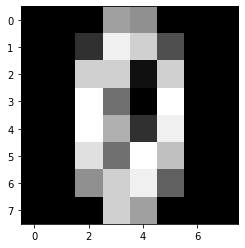

In [44]:
selInd = 2

imgErr = XTe[errInd[selInd],:].reshape(8,8)
plt.imshow(imgErr, cmap='gray')
print('Correct label = ' + str(yTe[errInd[selInd]]) + ', pred label = ' + str(pred[errInd[selInd]]))

### Additional exercices: Calculate accuracy with training sets with gradually smaller sizes


---

## Performance evaluation (Accuracy, ROC analysis)

### Classification Metrics:
- Classification Accuracy
- Logistic Loss
- Area Under the ROC Curve
- Confusion Matrix
- Precision, recall, f1-score, f2-score ...

### Regression Metrics:
- Mean Absolute Error
- Mean Squared Error
- Correlation coefficient

In [66]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

print(y.shape)
print(y[0:5,:])
print(y[-5:,:])

Automatically created module for IPython interactive environment
(150, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


### Add noisy features to make the problem harder

In [67]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

### Split data into training/testing sets

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

### Learn to predict each class against the other

In [69]:
mdlSVM = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=42))
y_score = mdlSVM.fit(X_train, y_train).decision_function(X_test)

print(y_score[0:10,:])

[[-0.53699403 -0.37058252 -0.09484063]
 [-0.32547943 -0.23275844 -0.45674334]
 [-1.30968015 -0.19328575  0.49959   ]
 [-0.65235044 -0.05542077 -0.30500346]
 [-0.70339074 -0.36225226  0.06515365]
 [-0.11719202  0.07901946 -0.963759  ]
 [-0.51853996 -0.27023465 -0.21505199]
 [-0.67392666 -0.0492538  -0.28176657]
 [-0.21562448 -0.26480737 -0.52371196]
 [-0.49292533 -0.56143192  0.04624825]]


### ROC Curve analysis for the first output category

In [70]:
fpr, tpr, thresh = roc_curve(y_test[:,0], y_score[:,0])
aucVal = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresh)
print('AUC is: ' + str(aucVal))

[0.         0.         0.         0.02173913 0.02173913 0.04347826
 0.04347826 0.06521739 0.06521739 0.17391304 0.17391304 0.19565217
 0.19565217 0.30434783 0.30434783 1.        ]
[0.         0.03448276 0.37931034 0.37931034 0.55172414 0.55172414
 0.5862069  0.5862069  0.68965517 0.68965517 0.82758621 0.82758621
 0.96551724 0.96551724 1.         1.        ]
[ 1.52830302  0.52830302  0.0453463   0.03735357 -0.12537881 -0.17410004
 -0.19263032 -0.21562448 -0.23860917 -0.29951116 -0.3366912  -0.35732546
 -0.3760954  -0.43089433 -0.4640132  -1.30968015]
AUC is: 0.9265367316341829


### Draw ROC curve

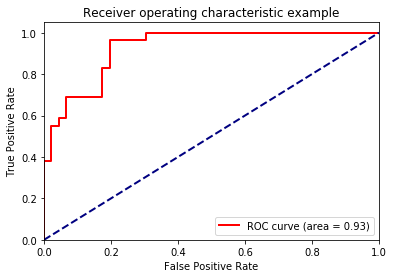

In [71]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % aucVal)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Add ROC curve for other output categories

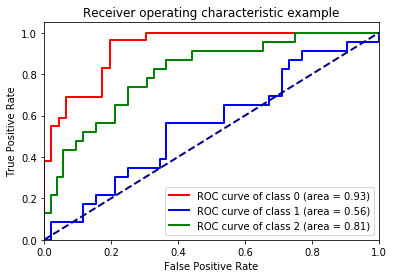

In [76]:
plt.figure()
lw = 2

colors = ['red', 'blue', 'green']

plt.figure
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    aucVal = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=lw, label='ROC curve of class %1d (area = %0.2f)' %(i, aucVal))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    